#### DATA LOADING

We read each sheet from the Excel workbook into separate pandas DataFrames.


In [1]:
import pandas as pd

# Load all sheets from the Excel file
excel_file = 'C:\\Users\\user\\Desktop\\Customer_Churn_Data_Large.xlsx'

# Read each sheet into separate DataFrames
Customer_Demographics = pd.read_excel(excel_file, sheet_name='Customer_Demographics')
Transaction_History = pd.read_excel(excel_file, sheet_name='Transaction_History')
Customer_Service = pd.read_excel(excel_file, sheet_name='Customer_Service')
Online_Activity = pd.read_excel(excel_file, sheet_name='Online_Activity')
Churn_Status = pd.read_excel(excel_file, sheet_name='Churn_Status')



### INITIAL DATA INSPECTION AND CLEANING
 we examine each dataset to:
- Understand structure (summary, data types)
- Check for missing values
- Identify duplicates
- Detect outliers
- Find categorical inconsistencies or misspellings


In [2]:
# Preview each dataframe
print(Customer_Demographics.head())
print(Transaction_History.head())
print(Customer_Service.head())
print(Online_Activity.head())
print(Churn_Status.head())

# Check for missing values
[df.isnull().sum() for df in [Customer_Demographics, Transaction_History, Customer_Service, Online_Activity, Churn_Status]]



# check data types and basic info
print("\nDemographic Dataset:")
Customer_Demographics.info()
display(Customer_Demographics.describe(include='all'))

print("\nTransactions Dataset:")
Transaction_History.info()
display(Transaction_History.describe(include='all'))

print("\nService Dataset:")
Customer_Service.info()
display(Customer_Service.describe(include='all'))

print("\nOnline Dataset:")
Online_Activity.info()
display(Online_Activity.describe(include='all'))

print("\nChurn Dataset:")
Churn_Status.info()
display(Churn_Status.describe(include='all'))


# Check for duplicates
print("Duplicate rows in transactions:", Transaction_History.duplicated().sum())
print("Duplicate rows in service:", Customer_Service.duplicated().sum())
print("Duplicate rows in online activity:", Online_Activity.duplicated().sum())
print("Duplicate rows in churn:", Churn_Status.duplicated().sum())
print("Duplicate rows in Demographics:",Customer_Demographics.duplicated().sum())


   CustomerID  Age Gender MaritalStatus IncomeLevel
0           1   62      M        Single         Low
1           2   65      M       Married         Low
2           3   18      M        Single         Low
3           4   21      M       Widowed         Low
4           5   21      M      Divorced      Medium
   CustomerID  TransactionID TransactionDate  AmountSpent ProductCategory
0           1           7194      2022-03-27       416.50     Electronics
1           2           7250      2022-08-08        54.96        Clothing
2           2           9660      2022-07-25       197.50     Electronics
3           2           2998      2022-01-25       101.31       Furniture
4           2           1228      2022-07-24       397.37        Clothing
   CustomerID  InteractionID InteractionDate InteractionType ResolutionStatus
0           1           6363      2022-03-31         Inquiry         Resolved
1           2           3329      2022-03-17         Inquiry         Resolved
2         

,CustomerID,Age,Gender,MaritalStatus,IncomeLevel
count,1000.000000,1000.000000,1000,1000,1000
unique,NaN,NaN,2,4,3
top,NaN,NaN,F,Widowed,High
freq,NaN,NaN,513,276,349
mean,500.500000,43.267000,NaN,NaN,NaN
std,288.819436,15.242311,NaN,NaN,NaN
min,1.000000,18.000000,NaN,NaN,NaN
25%,250.750000,30.000000,NaN,NaN,NaN
50%,500.500000,43.000000,NaN,NaN,NaN
75%,750.250000,56.000000,NaN,NaN,NaN



Transactions Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5054 entries, 0 to 5053
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   CustomerID       5054 non-null   int64         
 1   TransactionID    5054 non-null   int64         
 2   TransactionDate  5054 non-null   datetime64[ns]
 3   AmountSpent      5054 non-null   float64       
 4   ProductCategory  5054 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 197.6+ KB


,CustomerID,TransactionID,TransactionDate,AmountSpent,ProductCategory
count,5054.000000,5054.000000,5054,5054.000000,5054
unique,NaN,NaN,NaN,NaN,5
top,NaN,NaN,NaN,NaN,Books
freq,NaN,NaN,NaN,NaN,1041
mean,501.424218,5510.538979,2022-07-01 19:25:37.158686208,250.707351,NaN
min,1.000000,1000.000000,2022-01-01 00:00:00,5.180000,NaN
25%,251.000000,3242.000000,2022-04-03 00:00:00,127.105000,NaN
50%,506.000000,5530.000000,2022-07-01 00:00:00,250.525000,NaN
75%,749.000000,7680.750000,2022-09-29 00:00:00,373.412500,NaN
max,1000.000000,9997.000000,2022-12-31 00:00:00,499.860000,NaN



Service Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1002 entries, 0 to 1001
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   CustomerID        1002 non-null   int64         
 1   InteractionID     1002 non-null   int64         
 2   InteractionDate   1002 non-null   datetime64[ns]
 3   InteractionType   1002 non-null   object        
 4   ResolutionStatus  1002 non-null   object        
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 39.3+ KB


,CustomerID,InteractionID,InteractionDate,InteractionType,ResolutionStatus
count,1002.000000,1002.000000,1002,1002,1002
unique,NaN,NaN,NaN,3,2
top,NaN,NaN,NaN,Feedback,Resolved
freq,NaN,NaN,NaN,360,523
mean,485.209581,5952.887226,2022-07-02 19:28:22.994011904,NaN,NaN
min,1.000000,2015.000000,2022-01-01 00:00:00,NaN,NaN
25%,238.250000,3991.500000,2022-04-07 00:00:00,NaN,NaN
50%,474.500000,5911.500000,2022-07-02 12:00:00,NaN,NaN
75%,735.750000,7908.250000,2022-09-30 00:00:00,NaN,NaN
max,995.000000,9997.000000,2022-12-30 00:00:00,NaN,NaN



Online Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   CustomerID      1000 non-null   int64         
 1   LastLoginDate   1000 non-null   datetime64[ns]
 2   LoginFrequency  1000 non-null   int64         
 3   ServiceUsage    1000 non-null   object        
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 31.4+ KB


,CustomerID,LastLoginDate,LoginFrequency,ServiceUsage
count,1000.000000,1000,1000.000000,1000
unique,NaN,NaN,NaN,3
top,NaN,NaN,NaN,Online Banking
freq,NaN,NaN,NaN,349
mean,500.500000,2023-07-05 21:28:48,25.912000,NaN
min,1.000000,2023-01-01 00:00:00,1.000000,NaN
25%,250.750000,2023-04-08 00:00:00,13.750000,NaN
50%,500.500000,2023-07-10 12:00:00,27.000000,NaN
75%,750.250000,2023-10-01 06:00:00,38.000000,NaN
max,1000.000000,2023-12-31 00:00:00,49.000000,NaN



Churn Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   CustomerID   1000 non-null   int64
 1   ChurnStatus  1000 non-null   int64
dtypes: int64(2)
memory usage: 15.8 KB


,CustomerID,ChurnStatus
count,1000.000000,1000.000000
mean,500.500000,0.204000
std,288.819436,0.403171
min,1.000000,0.000000
25%,250.750000,0.000000
50%,500.500000,0.000000
75%,750.250000,0.000000
max,1000.000000,1.000000


Duplicate rows in transactions: 0
Duplicate rows in service: 0
Duplicate rows in online activity: 0
Duplicate rows in churn: 0
Duplicate rows in Demographics: 0


#### Aggregate Transaction History

In [3]:
# Aggregate transaction history and get favorite product for each customerID
trans_agg = Transaction_History.groupby('CustomerID').agg(
    total_spent=('AmountSpent', 'sum'),
    avg_transaction=('AmountSpent', 'mean'),
    transaction_count=('TransactionID', 'count'),
)

# Get favorite product category
def get_favorite_category(df):
    return df['ProductCategory'].value_counts().index[0]

category_agg = Transaction_History.groupby('CustomerID').apply(get_favorite_category).reset_index()
category_agg.columns = ['CustomerID', 'favorite_category']
trans_agg = trans_agg.merge(category_agg, on='CustomerID', how='left')

print('Aggregated Transaction History :',trans_agg.head())


Aggregated Transaction History :    CustomerID  total_spent  avg_transaction  transaction_count  \
0           1       416.50        416.50000                  1   
1           2      1547.42        221.06000                  7   
2           3      1702.98        283.83000                  6   
3           4       917.29        183.45800                  5   
4           5      2001.49        250.18625                  8   

  favorite_category  
0       Electronics  
1       Electronics  
2         Furniture  
3       Electronics  
4         Groceries  


C:\Users\user\AppData\Local\Temp\ipykernel_3736\2576858792.py:12: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  category_agg = Transaction_History.groupby('CustomerID').apply(get_favorite_category).reset_index()


#### Aggregate Customer Service Data

In [4]:
# Aggregate customer service data
service_agg = Customer_Service.groupby('CustomerID').agg(
    service_interaction_count=('InteractionID', 'count'),
)

# Calculate unresolved issues percentage
unresolved = Customer_Service[Customer_Service['ResolutionStatus'] != 'Resolved']
unresolved_count = unresolved.groupby('CustomerID').size().reset_index(name='unresolved_count')
service_agg = service_agg.merge(unresolved_count, on='CustomerID', how='left')
service_agg['unresolved_count'] = service_agg['unresolved_count'].fillna(0)
service_agg['unresolved_percentage'] = (
    service_agg['unresolved_count'] / service_agg['service_interaction_count'] * 100
)
print(service_agg.head())
# interaction types
interaction_types_dummies = pd.get_dummies(
    Customer_Service[['CustomerID', 'InteractionType']],
    columns=['InteractionType'],
    prefix='interaction'
)
interaction_type_agg = interaction_types_dummies.groupby('CustomerID').sum().reset_index()

service_agg = service_agg.merge(interaction_type_agg, on='CustomerID', how='left')
print('Aggregated Customer Service :',service_agg.head())

   CustomerID  service_interaction_count  unresolved_count  \
0           1                          1               0.0   
1           2                          1               0.0   
2           3                          1               0.0   
3           4                          2               1.0   
4           6                          1               0.0   

   unresolved_percentage  
0                    0.0  
1                    0.0  
2                    0.0  
3                   50.0  
4                    0.0  
Aggregated Customer Service :    CustomerID  service_interaction_count  unresolved_count  \
0           1                          1               0.0   
1           2                          1               0.0   
2           3                          1               0.0   
3           4                          2               1.0   
4           6                          1               0.0   

   unresolved_percentage  interaction_Complaint  interaction_F

In [5]:
# Convert categorical variables to dummies
Customer_Demographics = pd.get_dummies(Customer_Demographics, columns=['MaritalStatus','IncomeLevel'], drop_first=True)
pd.get_dummies(Customer_Demographics['Gender'])
 
# Merge all dataframes into one final dataframe (Llyod)
Llyod= Customer_Demographics.merge(trans_agg, on='CustomerID', how='left')
Llyod= Llyod.merge(service_agg, on='CustomerID', how='left')
Llyod= Llyod.merge(Online_Activity, on='CustomerID', how='left')
Llyod= Llyod.merge(Churn_Status[['CustomerID', 'ChurnStatus']], on='CustomerID', how='left')

# Handle missing values
Llyod = Llyod.fillna({
    'total_spent': 0,
    'transaction_count': 0,
    'avg_transaction': 0,
    'service_interaction_count': 0,
    'unresolved_percentage': 0,
    'LoginFrequency': 0,
    'ServiceUsage': 0,
    'interaction_Complaint': 0,
    'interaction_Feedback': 0,
    'interaction_Inquiry' : 0
})

# Drop columns we don't need anymore
columns_to_drop = ['LastLoginDate', 'unresolved_count']
Llyod = Llyod.drop(columns=columns_to_drop)

# FINAL CHECKS
print(Llyod.head())
print(Llyod.columns)




   CustomerID  Age Gender  MaritalStatus_Married  MaritalStatus_Single  \
0           1   62      M                  False                  True   
1           2   65      M                   True                 False   
2           3   18      M                  False                  True   
3           4   21      M                  False                 False   
4           5   21      M                  False                 False   

   MaritalStatus_Widowed  IncomeLevel_Low  IncomeLevel_Medium  total_spent  \
0                  False             True               False       416.50   
1                  False             True               False      1547.42   
2                  False             True               False      1702.98   
3                   True             True               False       917.29   
4                  False            False                True      2001.49   

   avg_transaction  transaction_count favorite_category  \
0        416.50000         

In [6]:
# Check data types and summaries
print(Llyod.info())
print(Llyod.describe(include='all'))
print(Llyod['ChurnStatus'].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CustomerID                 1000 non-null   int64  
 1   Age                        1000 non-null   int64  
 2   Gender                     1000 non-null   object 
 3   MaritalStatus_Married      1000 non-null   bool   
 4   MaritalStatus_Single       1000 non-null   bool   
 5   MaritalStatus_Widowed      1000 non-null   bool   
 6   IncomeLevel_Low            1000 non-null   bool   
 7   IncomeLevel_Medium         1000 non-null   bool   
 8   total_spent                1000 non-null   float64
 9   avg_transaction            1000 non-null   float64
 10  transaction_count          1000 non-null   int64  
 11  favorite_category          1000 non-null   object 
 12  service_interaction_count  1000 non-null   float64
 13  unresolved_percentage      1000 non-null   float6

In [7]:
# save as an excel file
Llyod.to_excel('Lyod_Bank.xlsx', index = False)

#### EXPLORATORY DATA ANALYSIS (EDA)

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import skew

In [9]:
# Basic Info
Llyod.shape
Llyod.info()
Llyod.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CustomerID                 1000 non-null   int64  
 1   Age                        1000 non-null   int64  
 2   Gender                     1000 non-null   object 
 3   MaritalStatus_Married      1000 non-null   bool   
 4   MaritalStatus_Single       1000 non-null   bool   
 5   MaritalStatus_Widowed      1000 non-null   bool   
 6   IncomeLevel_Low            1000 non-null   bool   
 7   IncomeLevel_Medium         1000 non-null   bool   
 8   total_spent                1000 non-null   float64
 9   avg_transaction            1000 non-null   float64
 10  transaction_count          1000 non-null   int64  
 11  favorite_category          1000 non-null   object 
 12  service_interaction_count  1000 non-null   float64
 13  unresolved_percentage      1000 non-null   float6

,CustomerID,Age,total_spent,avg_transaction,transaction_count,service_interaction_count,unresolved_percentage,interaction_Complaint,interaction_Feedback,interaction_Inquiry,LoginFrequency,ChurnStatus
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,43.267000,1267.074950,248.806511,5.054000,1.002000,31.550000,0.335000,0.36000,0.307000,25.912000,0.204000
std,288.819436,15.242311,738.590013,79.372766,2.603433,0.816494,41.033904,0.546877,0.58029,0.518671,14.055953,0.403171
min,1.000000,18.000000,9.800000,9.800000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000,0.000000
25%,250.750000,30.000000,626.685000,203.734167,3.000000,0.000000,0.000000,0.000000,0.00000,0.000000,13.750000,0.000000
50%,500.500000,43.000000,1232.880000,250.121458,5.000000,1.000000,0.000000,0.000000,0.00000,0.000000,27.000000,0.000000
75%,750.250000,56.000000,1791.902500,295.023854,7.000000,2.000000,50.000000,1.000000,1.00000,1.000000,38.000000,0.000000
max,1000.000000,69.000000,3386.040000,496.990000,9.000000,2.000000,100.000000,2.000000,2.00000,2.000000,49.000000,1.000000


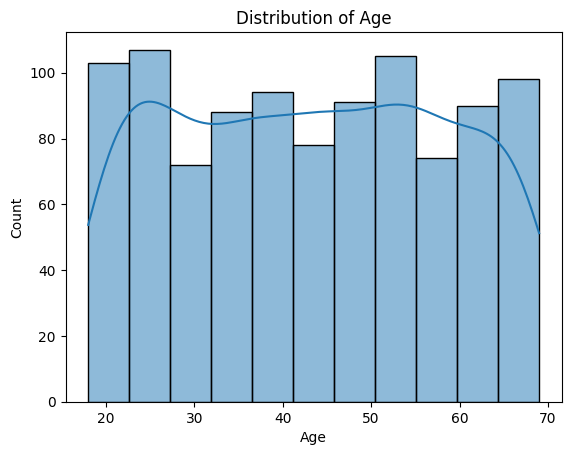

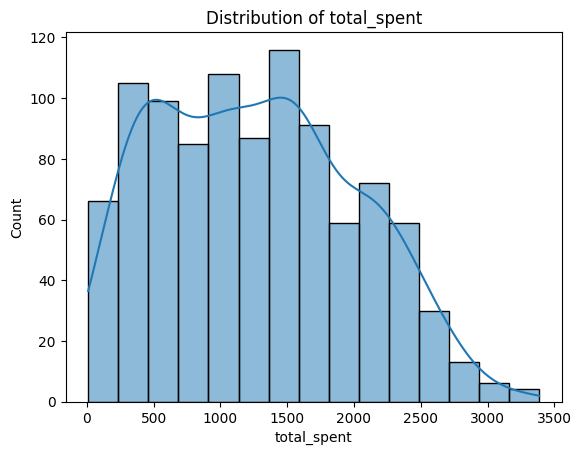

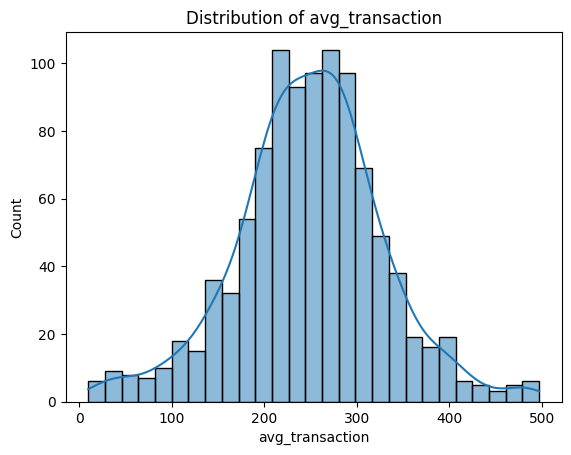

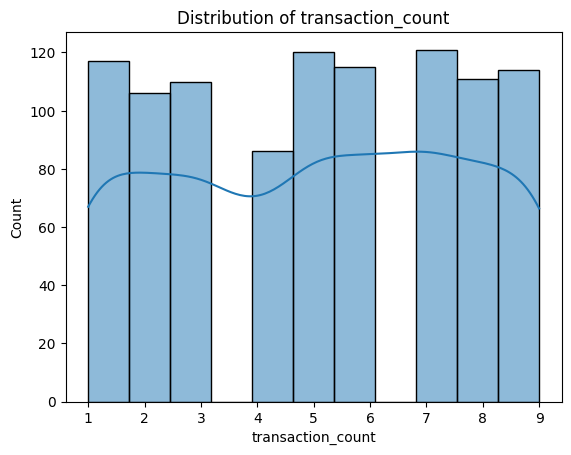

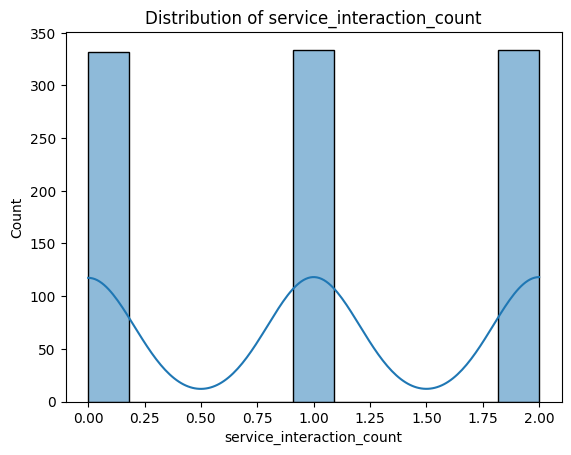

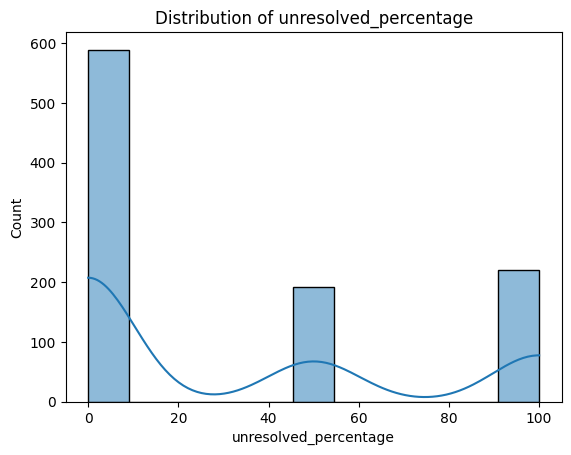

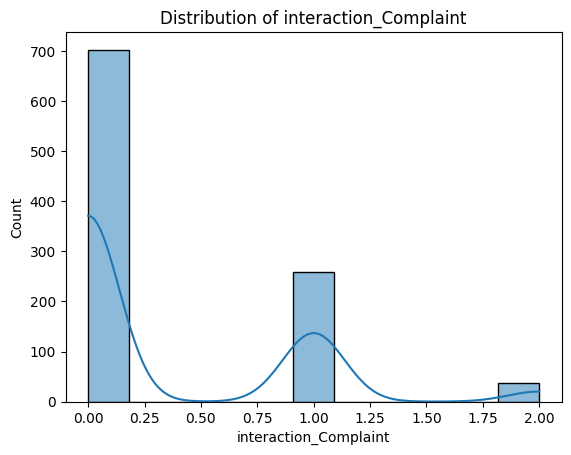

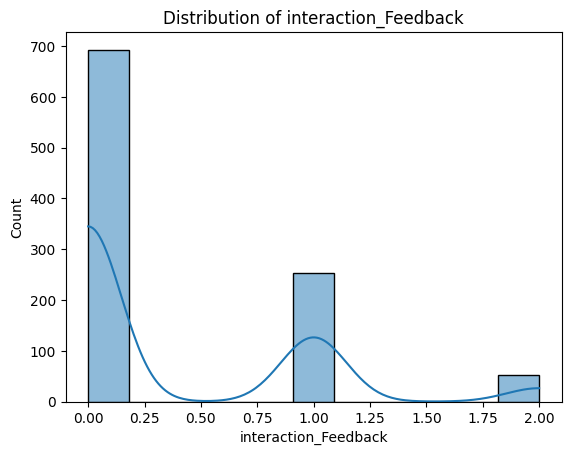

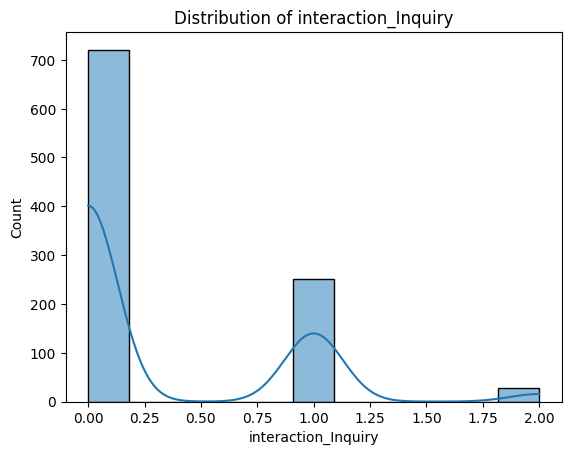

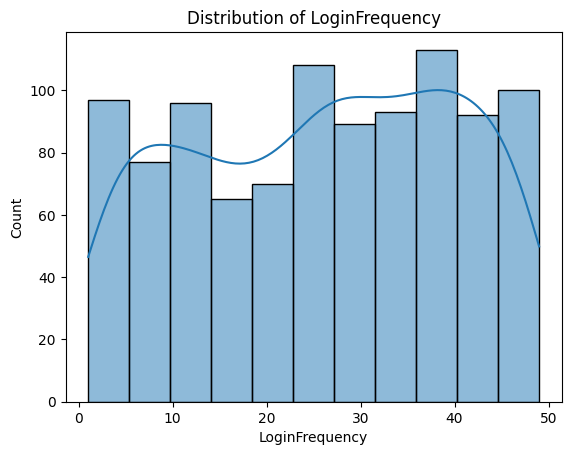

In [10]:
  # ----------------------
# 2. Univariate Analysis
# ----------------------
# Numerical features
numerical = ['Age', 'total_spent', 'avg_transaction', 'transaction_count',
             'service_interaction_count', 'unresolved_percentage',
             'interaction_Complaint', 'interaction_Feedback', 'interaction_Inquiry',
             'LoginFrequency']
for col in numerical:
    plt.figure()
    sns.histplot(Llyod[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()

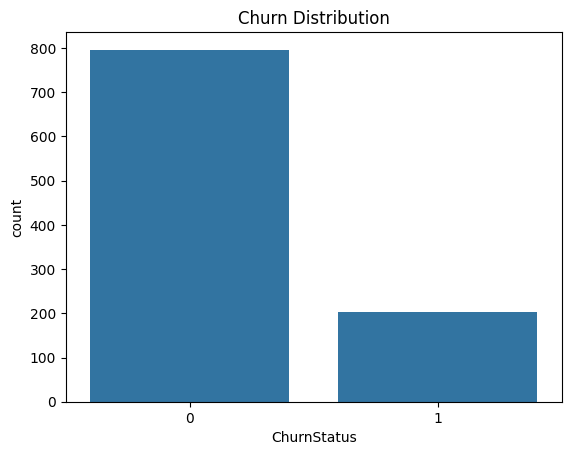

In [12]:
# Target variable
sns.countplot(x='ChurnStatus', data=Llyod)
plt.title("Churn Distribution")
plt.show()


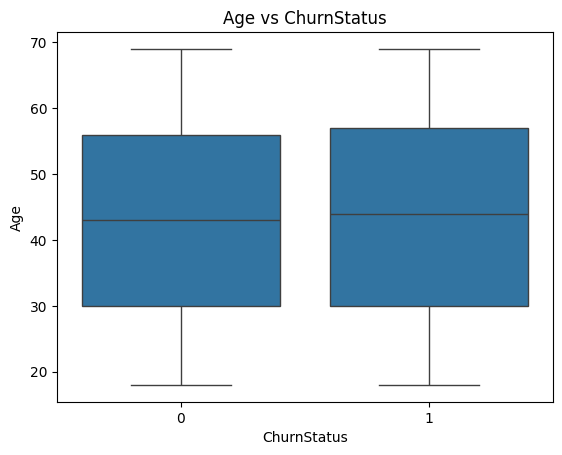

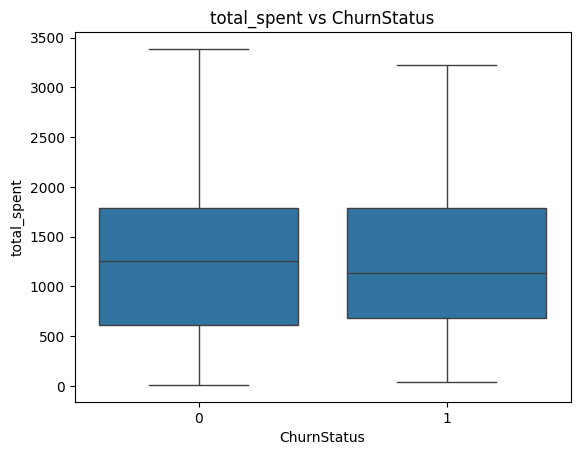

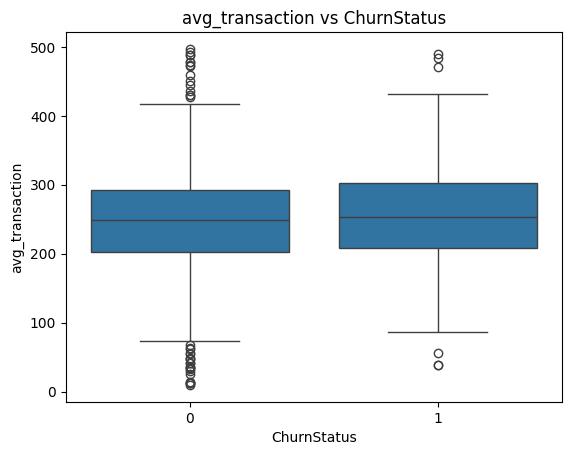

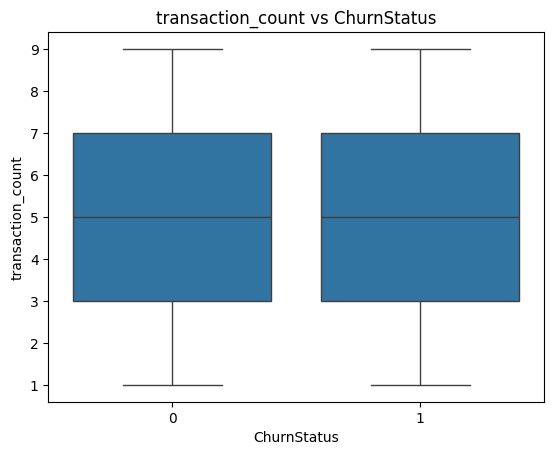

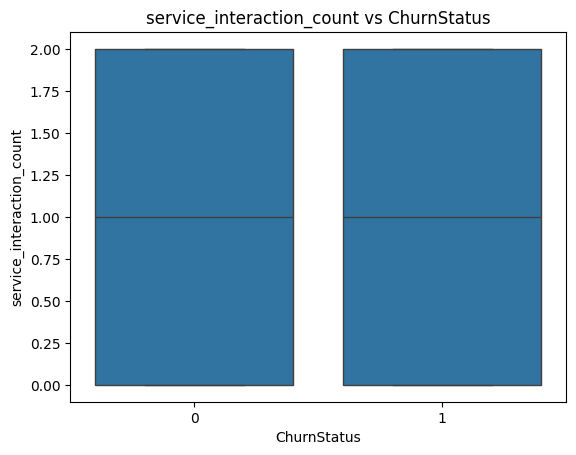

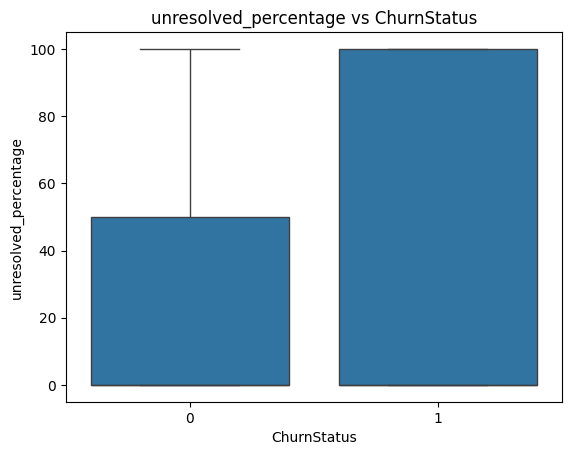

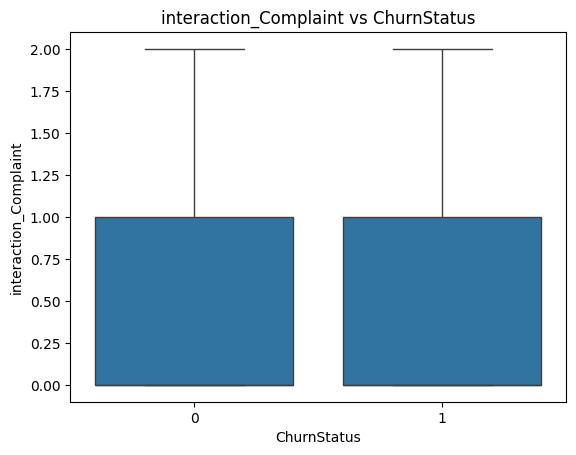

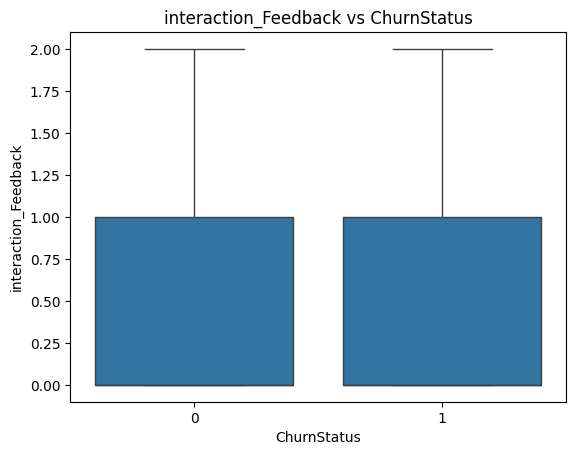

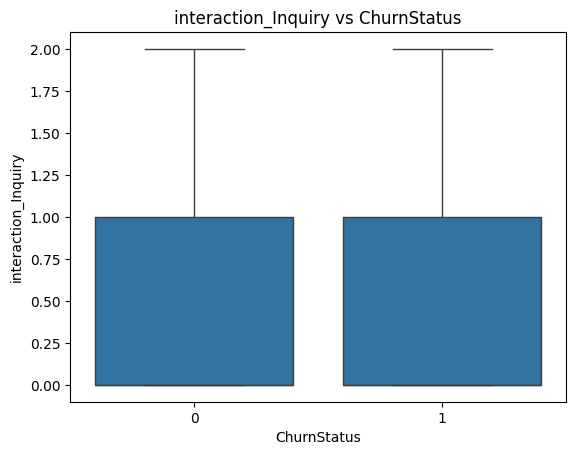

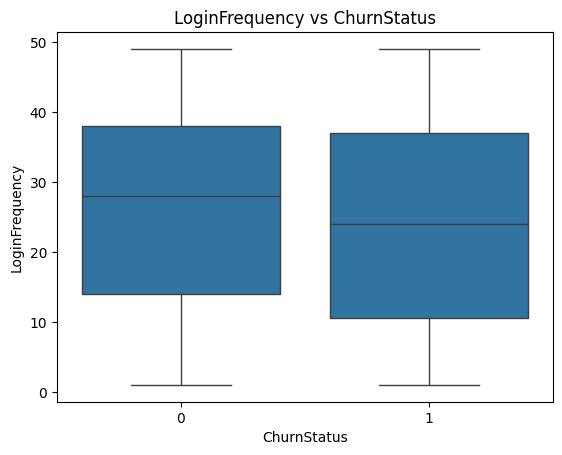

In [13]:
# ----------------------
# 3. Bivariate Analysis
# ----------------------
# Numerical vs Target
for col in numerical:
    plt.figure()
    sns.boxplot(x='ChurnStatus', y=col, data=Llyod)
    plt.title(f'{col} vs ChurnStatus')
    plt.show()

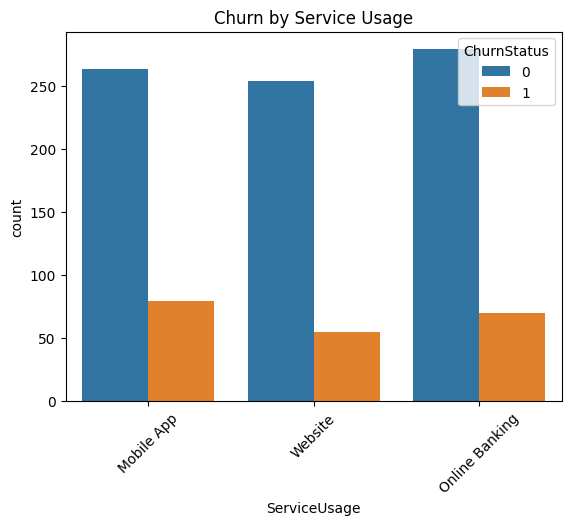

In [16]:
# Service Usage vs Churn
plt.figure()
sns.countplot(x='ServiceUsage', hue='ChurnStatus', data=Llyod)
plt.title('Churn by Service Usage')
plt.xticks(rotation=45)
plt.show()

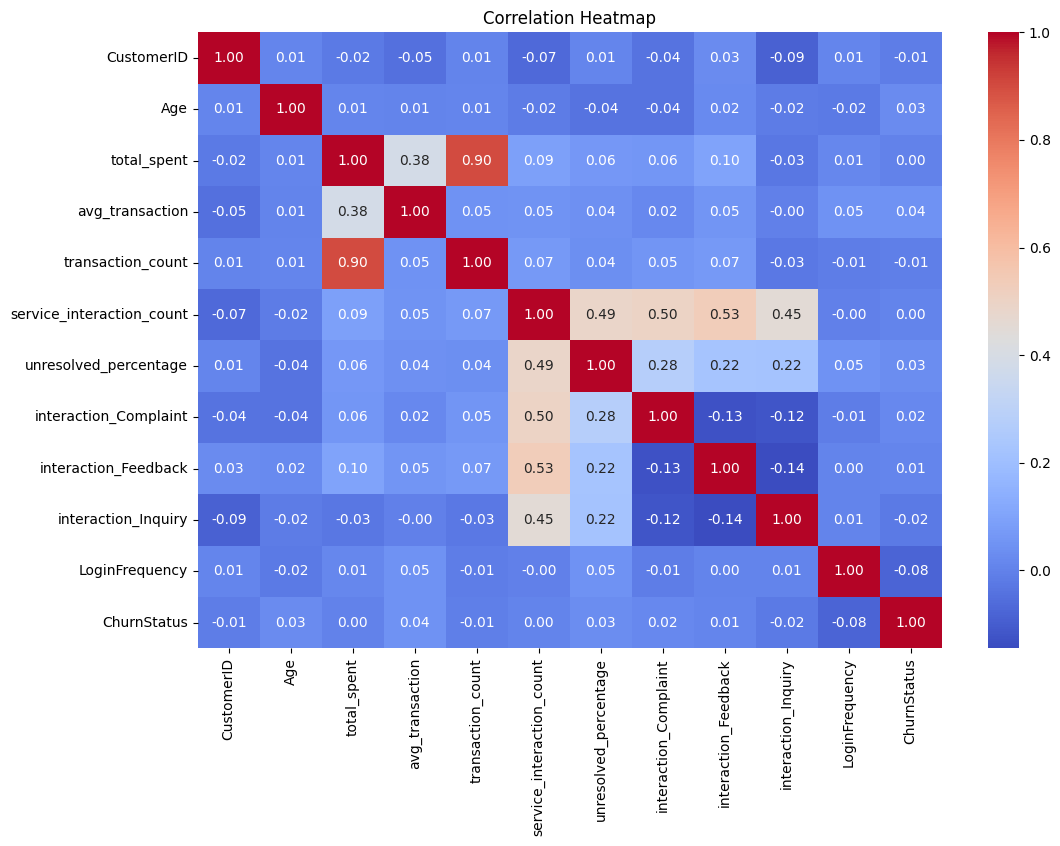

In [19]:
# ----------------------
# 4. Correlation Analysis
# ----------------------
corr = corr = Llyod.select_dtypes(['int64','float64']).corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


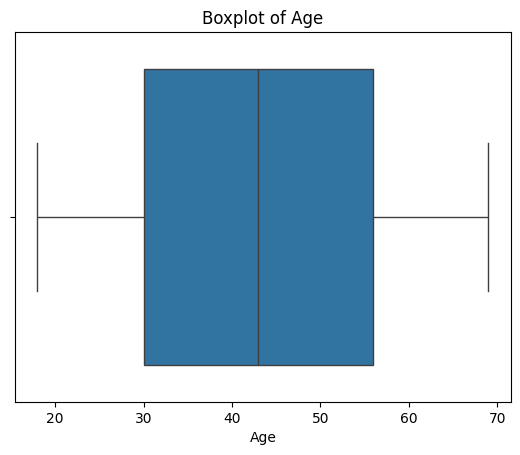

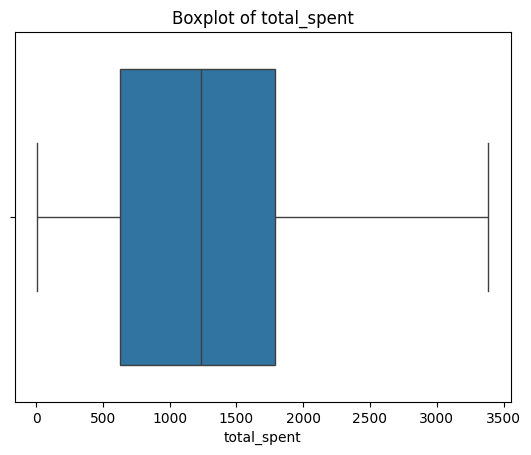

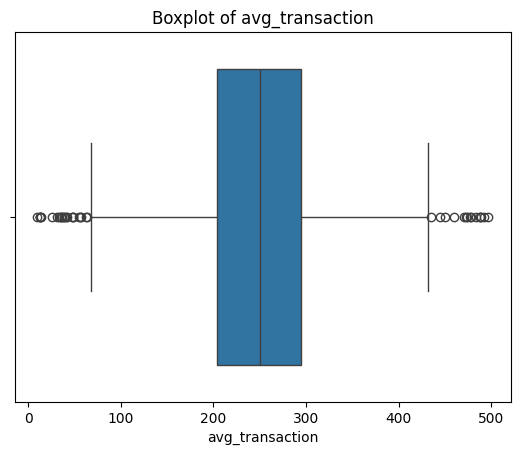

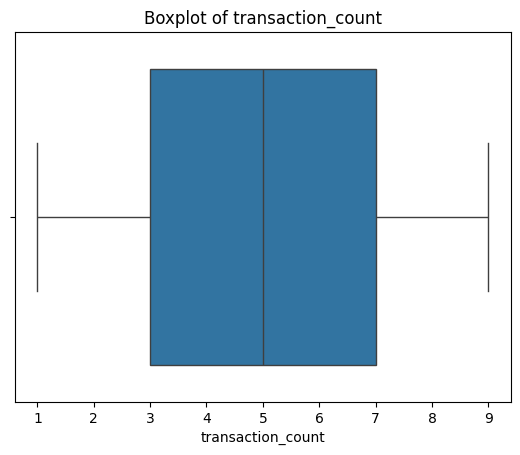

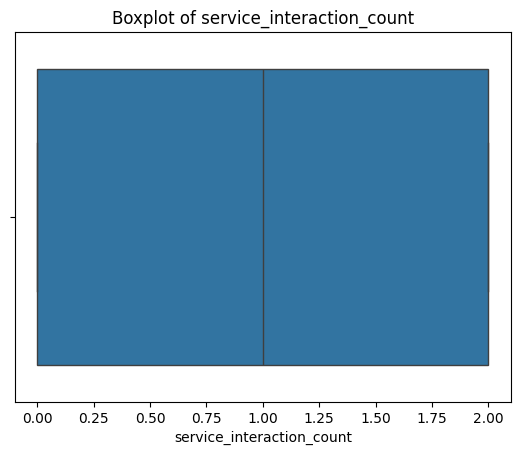

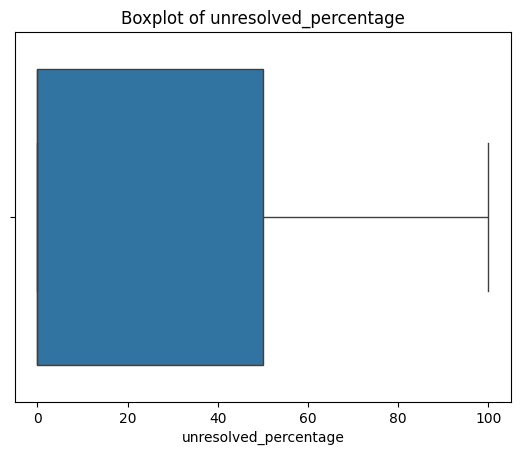

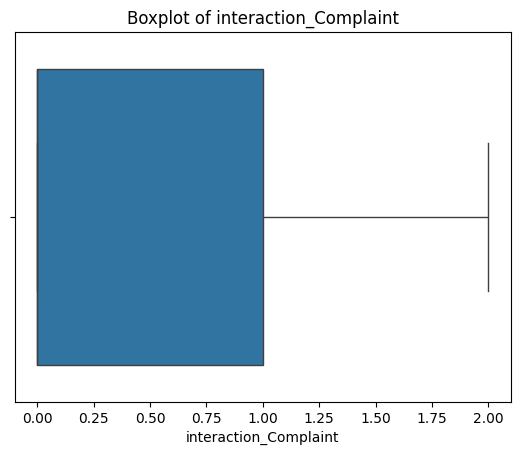

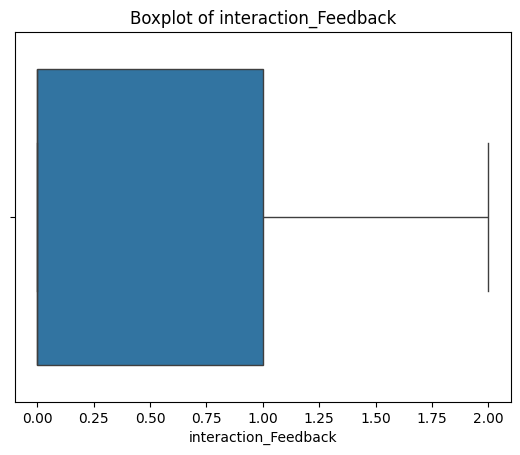

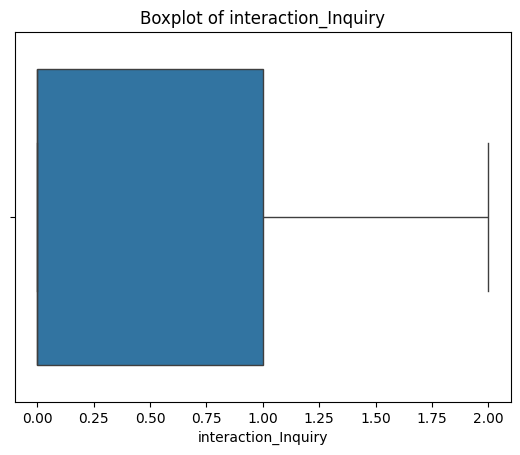

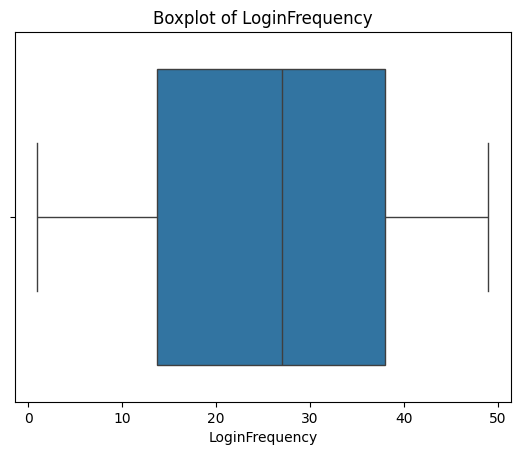

In [20]:
# ----------------------
# 6. Outliers
# ----------------------
for col in numerical:
    plt.figure()
    sns.boxplot(x=Llyod[col])
    plt.title(f'Boxplot of {col}')
    plt.show()


In [26]:
# ----------------------
# 6a. Remove Outliers from avg_transaction using IQR
# ----------------------
Q1 = Llyod['avg_transaction'].quantile(0.25)
Q3 = Llyod['avg_transaction'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Print the outlier bounds
print(f"Lower Bound: {lower_bound}, Upper Bound: {upper_bound}")

# Filter out the outliers
df = Llyod[(Llyod['avg_transaction'] >= lower_bound) & (Llyod['avg_transaction'] <= upper_bound)]

print("Shape after outlier removal:", Llyod.shape)


Lower Bound: 66.79963541666675, Upper Bound: 431.9583854166666
Shape after outlier removal: (1000, 20)


C:\Users\user\AppData\Local\Temp\ipykernel_3736\3821776446.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_values, y=top_names, palette='viridis')


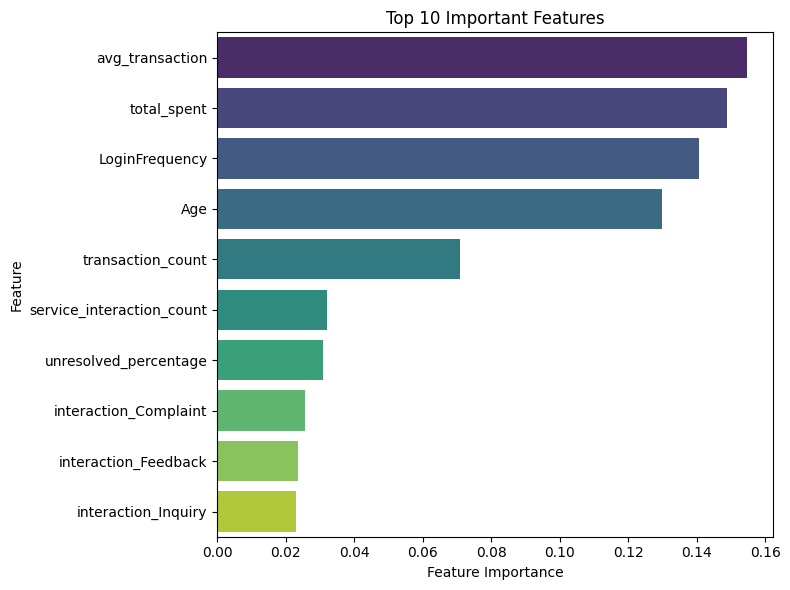

In [30]:
# ----------------------
# 7. Feature Importance 
# ----------------------
# Encode Gender
Llyod['Gender'] = Llyod['Gender'].map({'M': 0, 'F': 1})
# One-hot encode ServiceUsage and FavoriteCategory
Llyod = pd.get_dummies(Llyod, columns=['ServiceUsage', 'favorite_category'], drop_first=True)
X = Llyod.drop(['CustomerID', 'ChurnStatus'],axis=1)
y = Llyod['ChurnStatus']


model = RandomForestClassifier(random_state=42)
model.fit(X, y)

# Extract importance scores
importances = model.feature_importances_
feature_names = X.columns.tolist()

# Pair them up and sort
feature_importance = list(zip(feature_names, importances))
feature_importance.sort(key=lambda x: x[1], reverse=True)

# Top 10 Features
top_features = feature_importance[:10]
top_names = [item[0] for item in top_features]
top_values = [item[1] for item in top_features]

plt.figure(figsize=(8, 6))
sns.barplot(x=top_values, y=top_names, palette='viridis')
plt.title('Top 10 Important Features')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()